In [2]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline

In [3]:
psize = (10,20)
bsize = (np.array(psize, dtype=np.int16) + 2*np.ones((1,2), dtype=np.int16))[0]

In [4]:
def next_piece(puzzle, psize):
    nxt = (np.random.randint(psize) + np.ones((2,), dtype=np.int16))
    while puzzle[tuple(nxt)] == 1:
        nxt = (np.random.randint(psize) + np.ones((2,), dtype=np.int16))
    puzzle[tuple(nxt)] = 1
    return puzzle, nxt

def count_connected(puzzle):
    x, y = puzzle.shape - np.ones((2,), dtype=np.int16)
    connections = 0
    unconnected = 0
    for i in range(1, x):
        for j in range(1, y):
            adj = []
            for os in [-1,1]:
                adj.append(puzzle[i][j] * puzzle[i+os][j])
                adj.append(puzzle[i][j] * puzzle[i][j+os])
            if max(adj)>0:
                connections += sum(adj)
            if max(adj) == 0:
                unconnected += 1
    return int(connections/2), unconnected   # a adj b is b adj a

In [5]:
def sample():
    puzzle = np.zeros(bsize, dtype=np.int16)
    data = []
    for i in range(psize[0]*psize[1]):
        puzzle, n = next_piece(puzzle, psize)
        data.append((i, *count_connected(puzzle)))
    return np.array(data).T

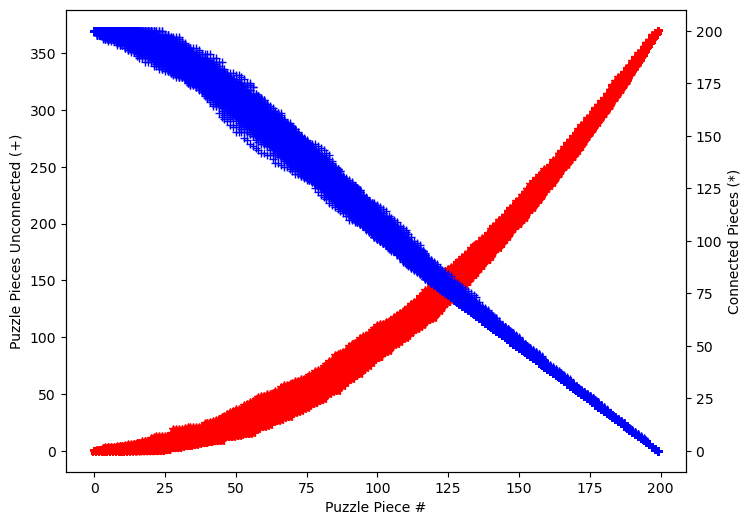

In [6]:
x = []
fig = plt.figure(figsize=[8,6])
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
for i in range(300):
    d = sample()
    x.append(d)
    ax1.plot(d[0], d[1], "*r")
    ax2.plot(d[0], d[2], "+b")
ax1.set_xlabel("Puzzle Piece #")
ax1.set_ylabel("Puzzle Pieces Unconnected (+)")
ax2.set_ylabel("Connected Pieces (*)")
plt.show()

In [7]:
y = np.array(x)
x = np.average(y, axis = 0)
print(x.shape)

(3, 200)


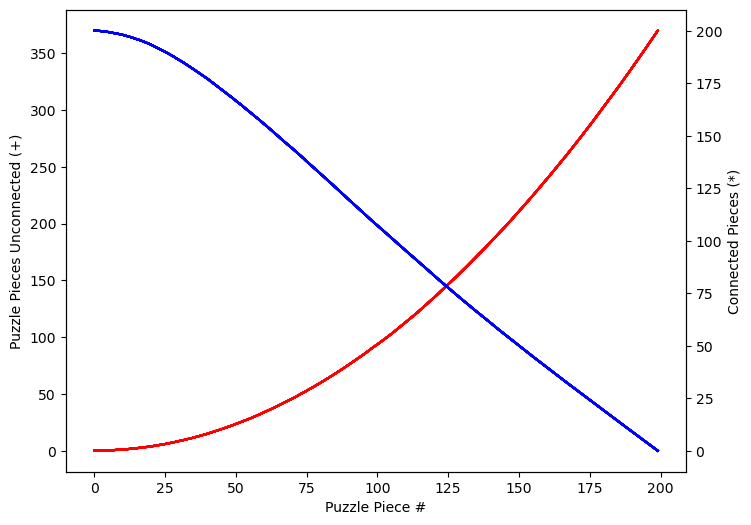

In [8]:
fig = plt.figure(figsize=[8,6])
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
for i in range(20):
    ax1.plot(d[0], x[1], "r-")
    ax2.plot(d[0], x[2], "b-")
ax1.set_xlabel("Puzzle Piece #")
ax1.set_ylabel("Puzzle Pieces Unconnected (+)")
ax2.set_ylabel("Connected Pieces (*)")
plt.show()

In [9]:
print(y.shape)

(300, 3, 200)


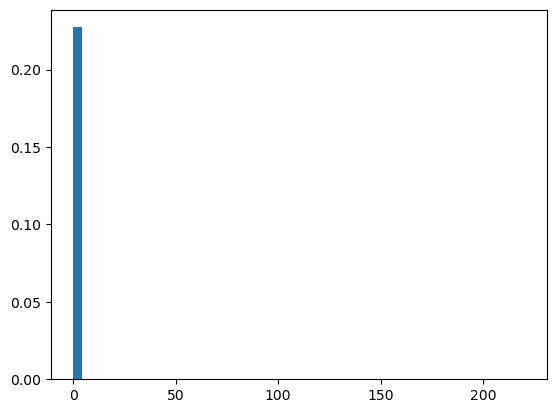

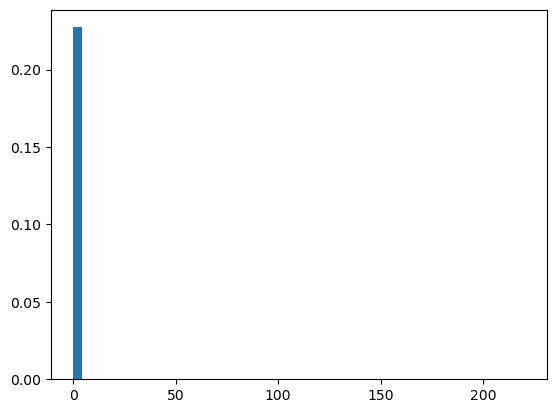

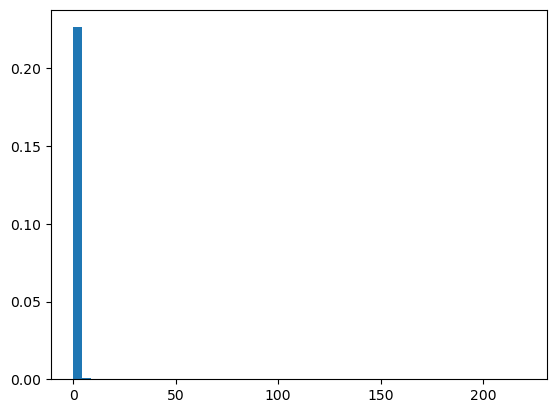

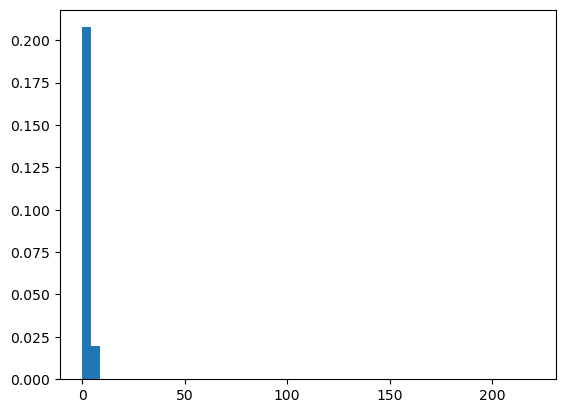

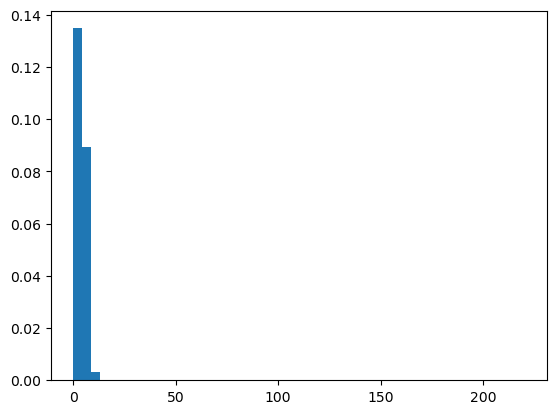

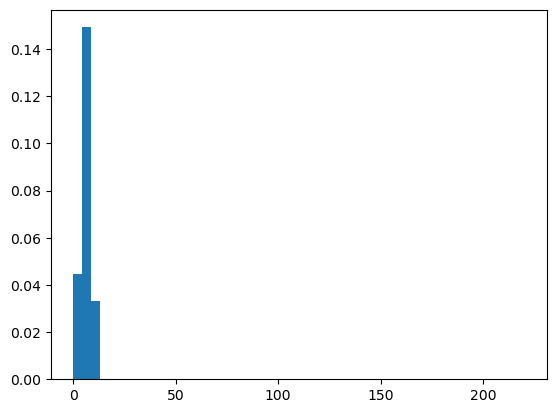

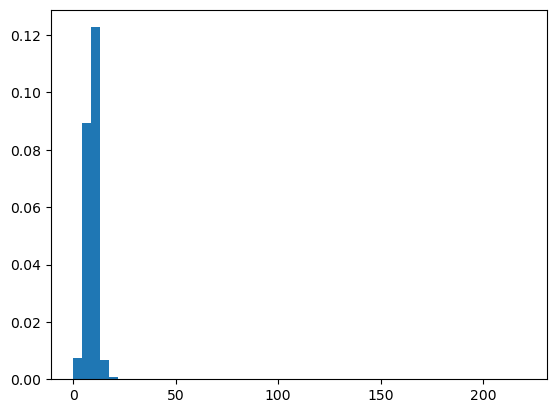

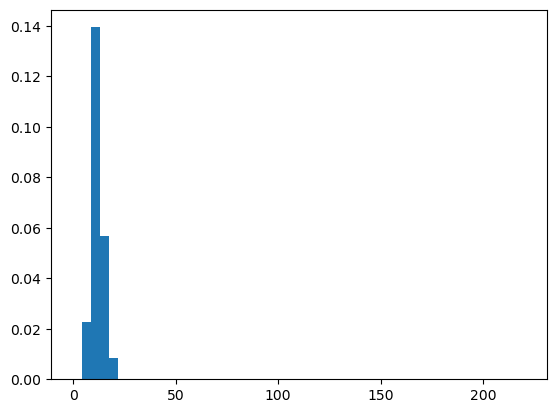

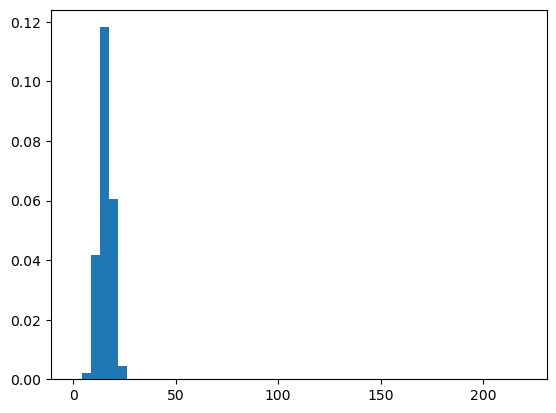

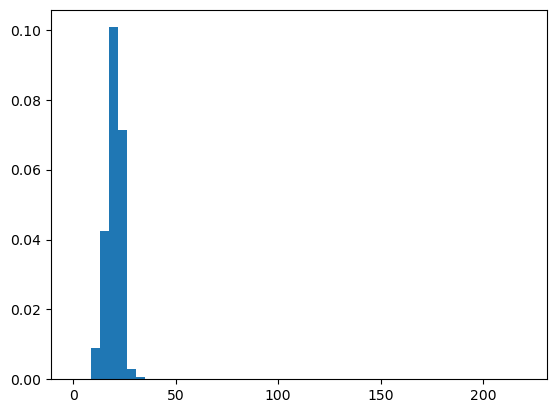

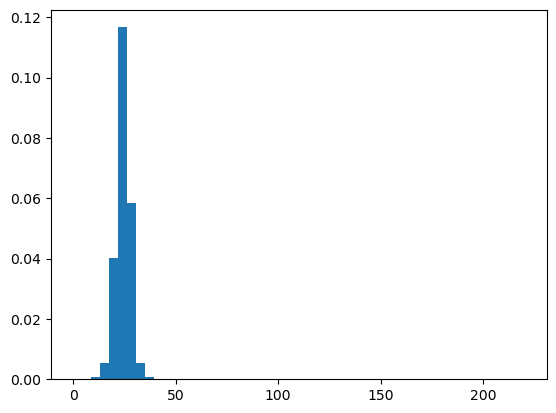

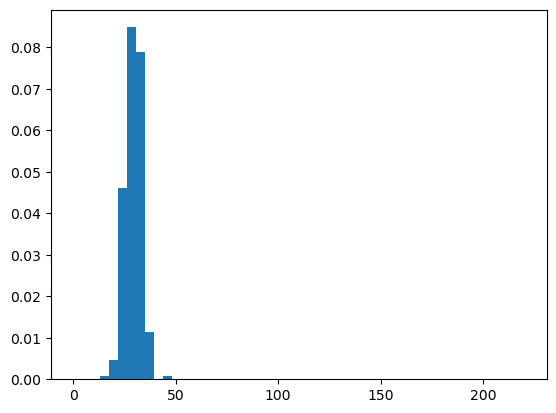

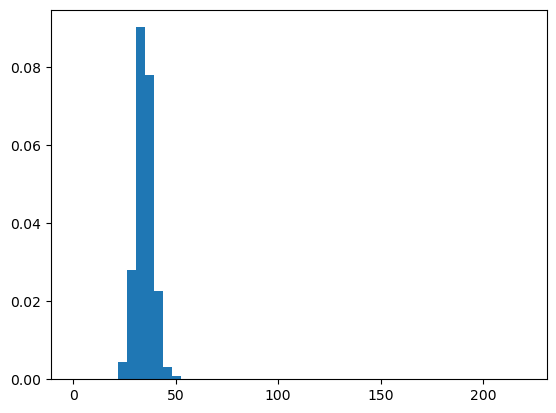

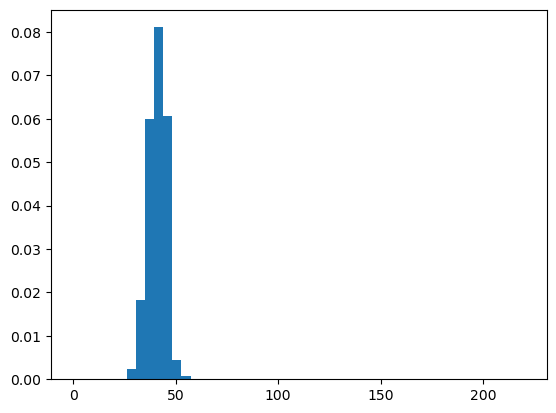

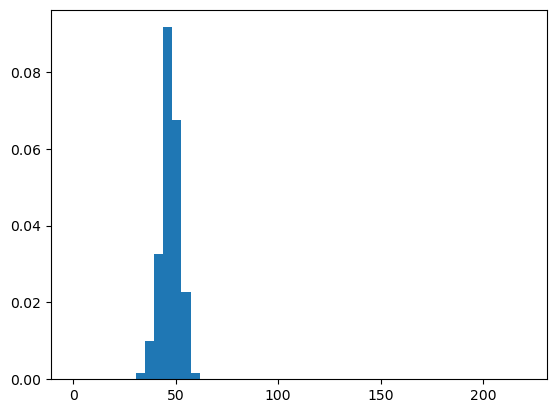

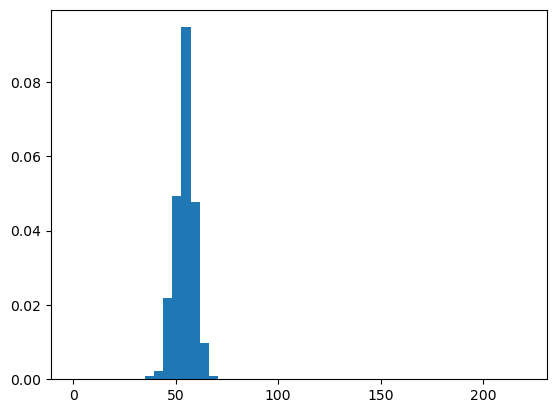

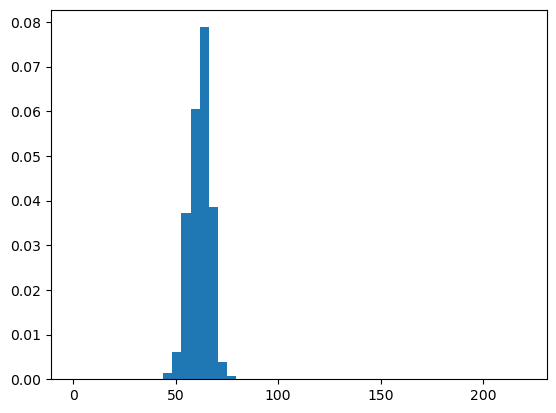

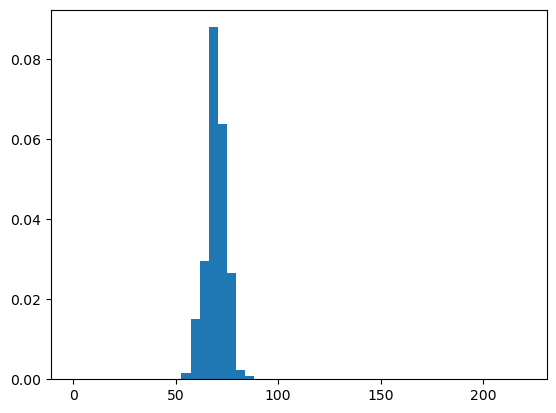

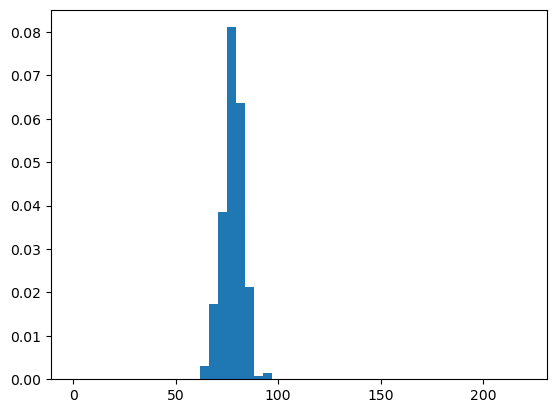

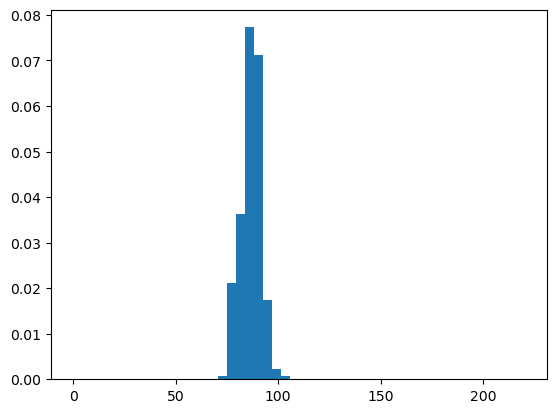

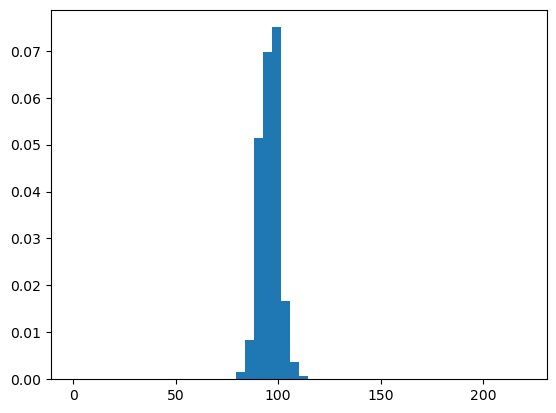

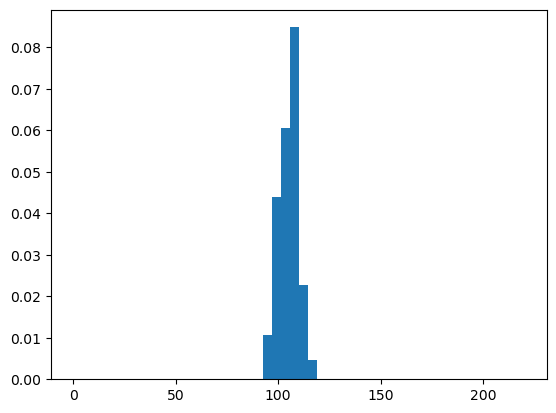

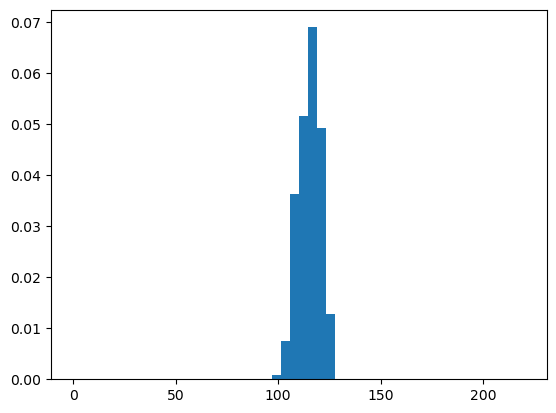

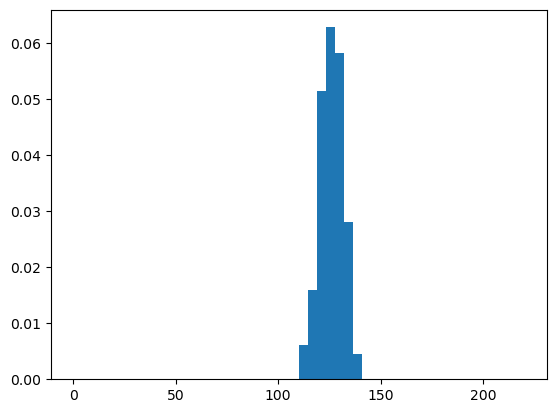

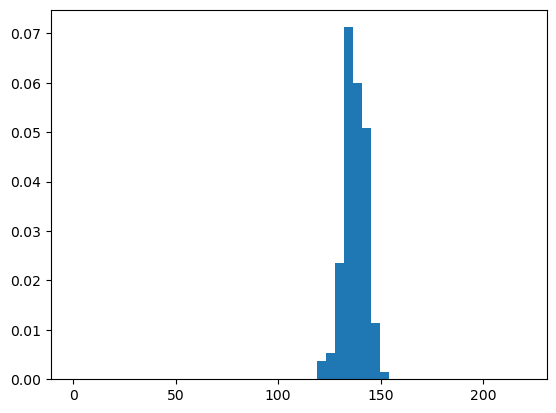

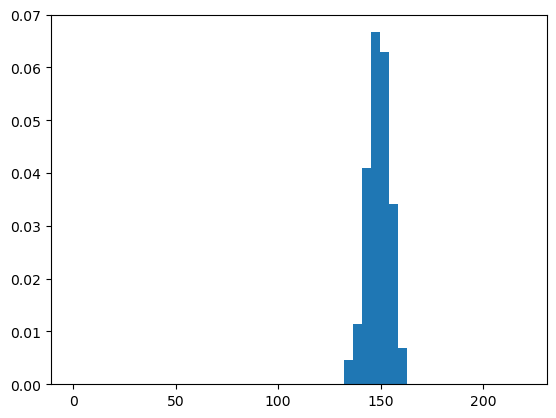

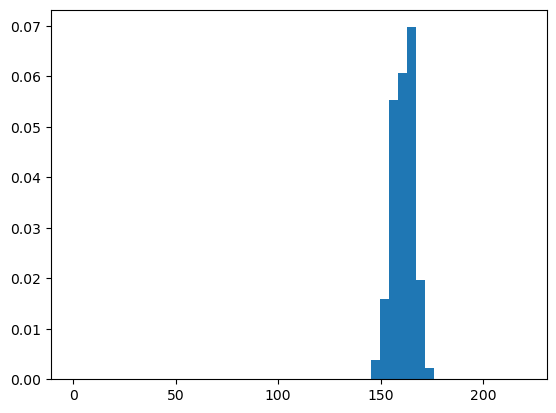

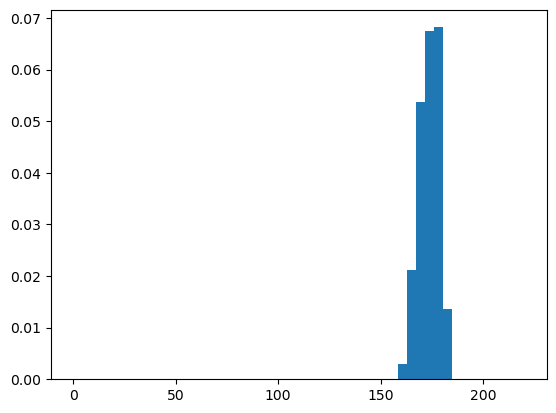

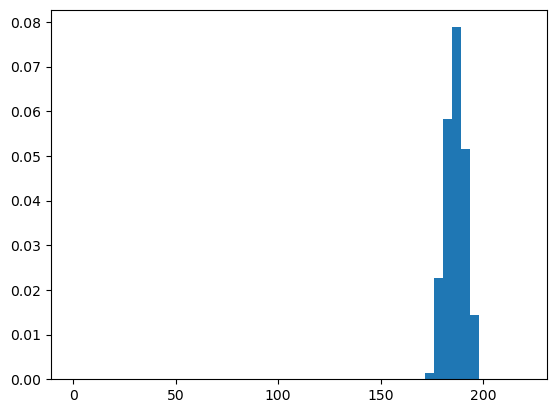

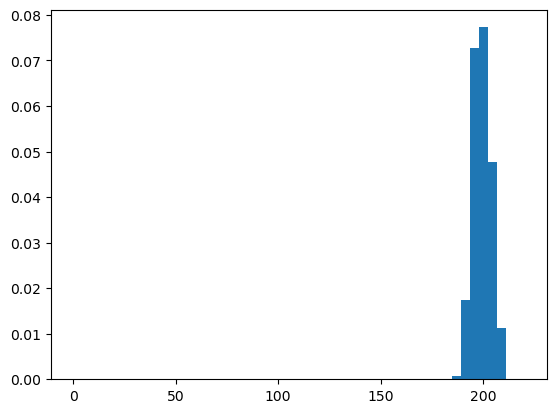

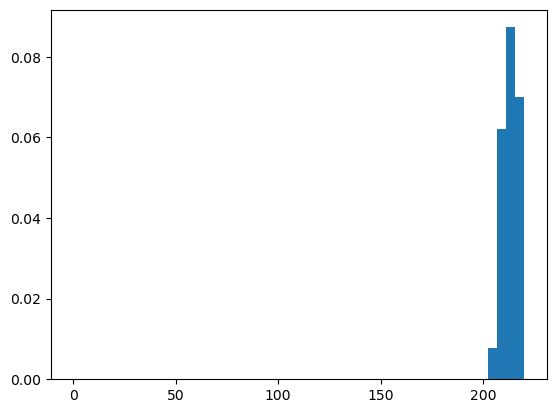

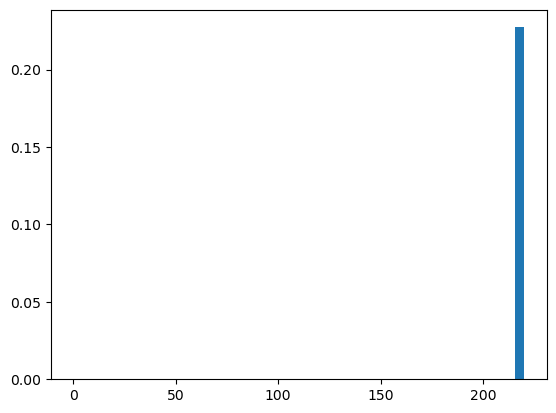

/opt/conda/lib/python3.13/site-packages/numpy/lib/_histograms_impl.py:897: RuntimeWarning: invalid value encountered in divide
  return n / db / n.sum(), bin_edges


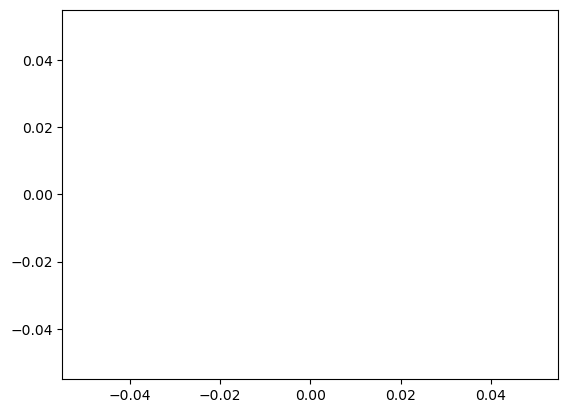

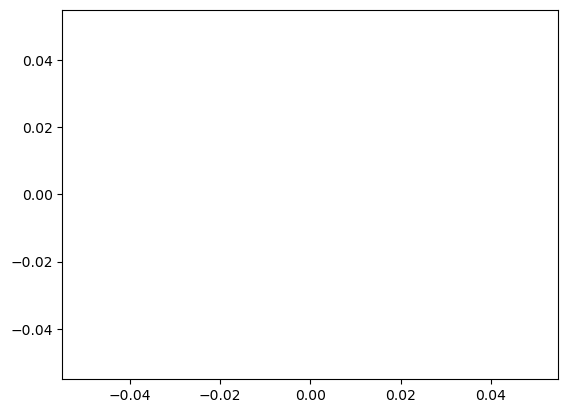

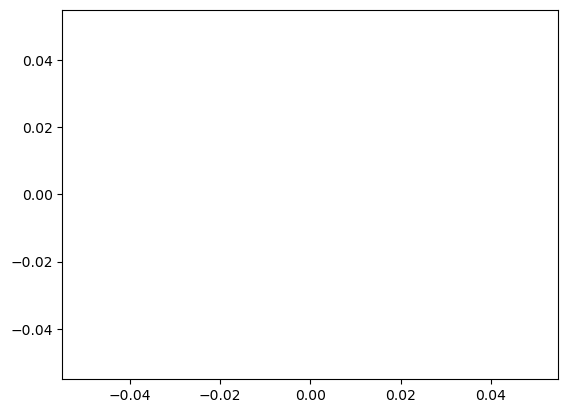

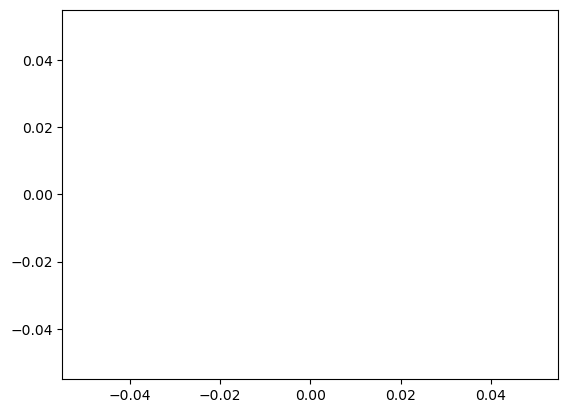

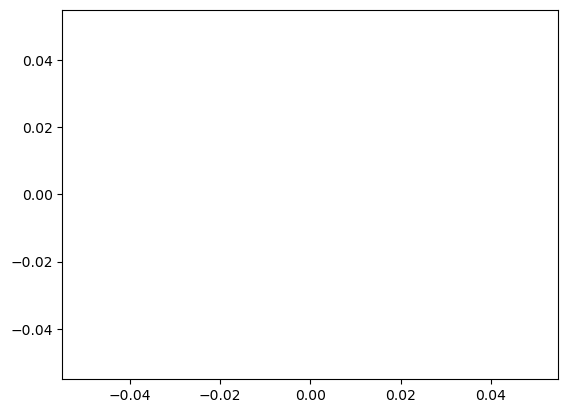

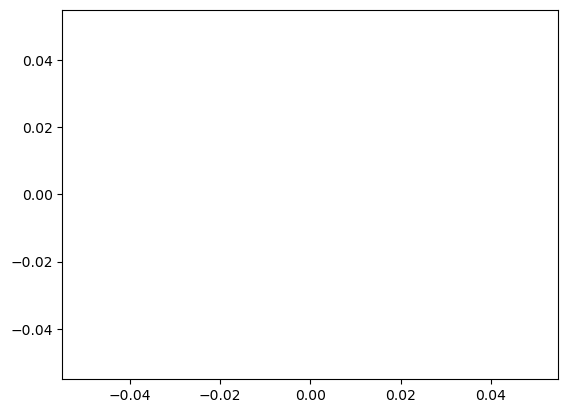

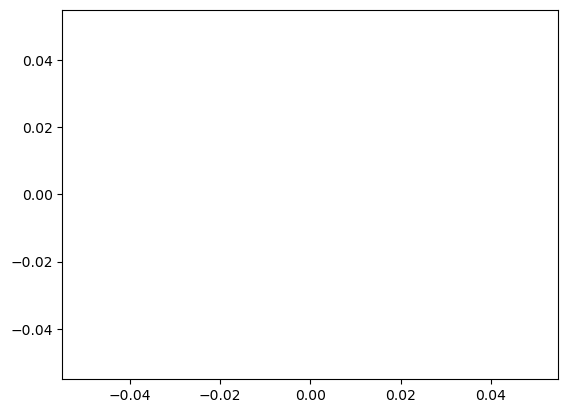

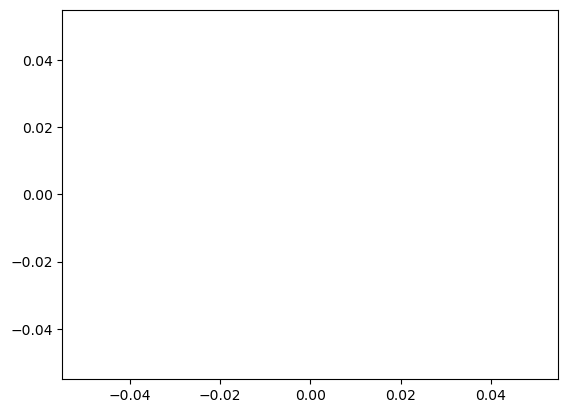

In [11]:
for i in range(1,200,5):
    plt.hist(y[:,1,i], range=[0,220], bins=50, density=True)
    plt.show()